## Неделя 1. Четверг

### Линейная алгебра и Numpy. Часть 1

#### 1. Линейная алгебра

Реши задачи вручную и впиши ответы в ячейки под заданиями. 

**1.1** Заданы векторы $\bar{a} = (-3; 5)$ $\bar{b} = (0; -1)$. 
Найти координаты вектора $\bar{c} = \bar{a} + \bar{b}$. 

(-3; 4)

**1.2** $\bar{a} = (3, -2)$. Найти координаты вектора $2\bar{a}$. 

(6; -4)

**1.3** Найти длину вектора $\bar{a} = (-4, 3) $.

5.2

**1.4** Найти длину вектора $\bar{a} = (1, 0, -4) $.

4.12

**1.5** Известно, что скалярное произведение векторов $(\bar{a}; \bar{b}) = 2$, а их длины равны $|\bar{a}| = 2, \;, |\bar{b}| = 2$. Найти угол между векторами $\bar{a}$ и $\bar{b}$. 

60 градусов

**1.6** Найти угол между векторами $\bar{a} = (1; \sqrt{3}),\; \bar{b} = (1; 0)$

60 градусов

**1.7** Вычислить скалярное произведение векторов, если их длины $|\bar{a}| = 2, \; |\bar{b}| = 3$, а угол между ними равен 60 градусам. 

3

**1.8** Найти скалярное произведение векторов $\bar{a} = (3; -1)$ и $\bar{b} = (-2; 7)$

-13

#### 2. Базовые задачи `numpy`

В этих задачах необходимо стараться реализовать все без циклов, чтобы сохранить оптимизационное приемущество библиотеки `numpy`

In [2]:
import numpy as np

__2.1__ У вас есть массив из 0 и 1. Создайте новый массив, заменив 1 на "blue", а 0 на "red".

`np.array([0, 0, 1, 0, 1]) => np.array(["red", "red", "blue", "red", "blue"])`

In [6]:
x = np.array([0, 0, 1, 0, 1])
x = np.where(x == 1, 'blue', 'red')
x

array(['red', 'red', 'blue', 'red', 'blue'], dtype='<U4')

__2.2__ У вас есть 2 массива одинаковой длины: числовой массив x и массив b из 0 и 1. Рассчитайте среднее элементов массива x на тех позициях, где b == 0, и среднее на тех позициях, где b == 1.

```
x = np.array([1, 2, 3, 4, 5])
b = np.array([1, 1, 0, 0, 1]) => {0: 3.5, 1: 2.6666666666666665}
```

In [12]:
x = np.array([1, 2, 3, 4, 5])
b = np.array([1, 1, 0, 0, 1]) 
# => {0: 3.5, 1: 2.6666666666666665}
b0 = (b == 0)
b1 = ~b0
avg0 = x[b0].mean()
avg1 = x[b1].mean()
d = {0: avg0, 1: avg1}
d

{0: np.float64(3.5), 1: np.float64(2.6666666666666665)}

__2.3__ Напишите функцию, которая получает на вход двумерный массив, и классификатор "row" или "column", и вычисляет среднее соответственно либо по строкам, либо по колонкам.

```
X = np.array([[0, 1], [2, 1]])

row_or_column_means(X, "row")    => np.array([0.5, 1.5])
row_or_column_means(X, "column") => np.array([1.0, 1.0])
```

In [14]:
x = np.array([[0, 1], [2, 1]])

def row_or_column_means(arr, op):
    if op == "row":
        return arr.mean(axis=1)
    elif op == "column":
        return arr.mean(axis=0)
    else:
        raise ValueError("classifier должен быть 'row' или 'column'")



print(row_or_column_means(x, "row"))   
# => np.array([0.5, 1.5])
print(row_or_column_means(x, "column")) 
# => np.array([1.0, 1.0])

[0.5 1.5]
[1. 1.]


__2.4__ Имея массив x и матрицу M (в виде двумерного массива), найдите строку в М, которая имеет наименьший угол с x.

In [19]:
x = np.array([1, 1])
M = np.array([[1, 1], 
              [2, 2],
              [3, 3]])


dots = np.dot(M, x)          


x_norm = np.linalg.norm(x)        
M_norms = np.linalg.norm(M, axis=1) 

cos = dots / (M_norms * x_norm)

idx = np.argmax(cos)
row = M[idx]

print("Строка:", row)


Строка: [3 3]


__2.5__ Получив числовую матрицу М, создайте новую матрицу, состоящую только из колонок М, в которых есть хотя бы одно отрицательное значение.

In [34]:
M = np.random.uniform(-5, 5, size=(5, 6))
print(M)
mask = (M < 0).any(axis=0)
new_M = M[:, mask]

print("Фильтр:", mask)
print("Новая матрица:\n", new_M)


[[-4.44976866  2.6161549   4.8143733  -2.27076379 -4.38398411  3.55872251]
 [ 1.54999843 -3.26641156  3.1928852   4.37309304  0.92805391 -1.40407987]
 [ 1.71306125 -3.72058728  1.64029954  1.79745045 -2.26288402  3.87795225]
 [ 1.44887468  0.75002683  2.08375105  3.45776756  3.38578229 -3.14066902]
 [ 3.81051527 -3.4596449   0.34688589 -1.16757883 -0.9453416   4.31304105]]
Фильтр: [ True  True False  True  True  True]
Новая матрица:
 [[-4.44976866  2.6161549  -2.27076379 -4.38398411  3.55872251]
 [ 1.54999843 -3.26641156  4.37309304  0.92805391 -1.40407987]
 [ 1.71306125 -3.72058728  1.79745045 -2.26288402  3.87795225]
 [ 1.44887468  0.75002683  3.45776756  3.38578229 -3.14066902]
 [ 3.81051527 -3.4596449  -1.16757883 -0.9453416   4.31304105]]


__2.6__ Напишите функцию, которая меняем местами 2 строки матрицы:

`def swap_rows(M, i, j)`

In [36]:
def swap_rows(M, i, j):
    M_copy = M.copy()
    M_copy[[i, j]] = M_copy[[j, i]]
    return M_copy

In [37]:
M = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

print(swap_rows(M, 0, 2))


[[7 8 9]
 [4 5 6]
 [1 2 3]]


__2.7__ Напишите функцию, которая создает квадратную матрицу с 0 и 1 в шахматном порядке.

```
[
  [1, 0, 1, 0, 1],
  [0, 1, 0, 1, 0],
  [1, 0, 1, 0, 1],
  [0, 1, 0, 1, 0],
  [1, 0, 1, 0, 1],
]
```

In [54]:
def checkerboard():
    arr = np.arange(25).reshape(5,5)
    arr = arr % 2
    return arr

In [55]:
print(checkerboard())

[[0 1 0 1 0]
 [1 0 1 0 1]
 [0 1 0 1 0]
 [1 0 1 0 1]
 [0 1 0 1 0]]


<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "linear algebra tasks in progress"`
4. Выполни команду `git push`

#### 3. Линейная алгебра + numpy в контексте машинного обучения

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

__3.1 Рекомендательные системы__

* У нас есть матрица оценок десяти пользователей по двум фильмам.

In [62]:
names = np.array(['John', 'Michael', 'David', 'James', 'William', 'Emily', 'Emma',
       'Olivia', 'Sophia', 'Isabella'])
moovie1 = np.array([ 7,  7,  4,  4, 10,  1,  1,  9,  5,  3])
moovie2 = np.array([ 1,  3,  9, 10,  3,  6, 10,  5,  6,  5])

In [63]:
df = pd.DataFrame(data={'moovie1': moovie1, 'moovie2': moovie2}, index=names)
df

,moovie1,moovie2
John,7,1
Michael,7,3
David,4,9
James,4,10
William,10,3
Emily,1,6
Emma,1,10
Olivia,9,5
Sophia,5,6
Isabella,3,5


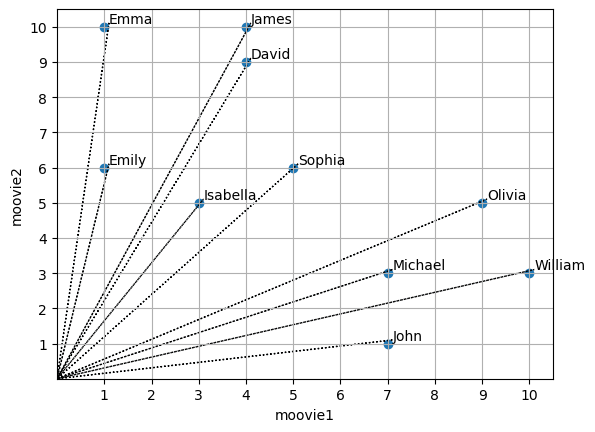

In [65]:
plt.scatter(df['moovie1'], df['moovie2'])
plt.xticks(np.arange(1, 11, 1))
plt.yticks(np.arange(1, 11, 1))
plt.xlim(0, 10.5)
plt.ylim(0, 10.5)
plt.xlabel('moovie1')
plt.ylabel('moovie2')

for i in range(len(df)):
    plt.arrow(0, 0, *(df.iloc[i] + 0.1), length_includes_head=True, linestyle=':')
    plt.text(*(df.iloc[i] + 0.1), names[i])
plt.grid()
plt.show()

1. Найдите для __Michael__ самого ближнего кинолюбителя по косинусному сходству(см.формулу в [лекции](https://github.com/Elbrus-DataScience/ds-phase-1/blob/master/slides/LinAlg_day1.pdf)), то есть имеющего c ним минимальный угол
2. То же самое, что в первом пункте, только по [евклидову расстоянию](https://www.engati.com/glossary/euclidean-distance)

2. То же самое, что в первом пункте, только по евклидову расстоянию

In [ ]:
#Michael = np.array([7, 3])
# total_ratings = your_code. Не забудьте Michael убрать из матрицы оценок

In [71]:
df_michaelless = df[df.index!='Michael']
Michael = np.array([7, 3])
dots = np.dot(df_michaelless, Michael)          
Michael_norm = np.linalg.norm(Michael)        
df_michaelless_norms = np.linalg.norm(df_michaelless, axis=1) 
cos = dots / (df_michaelless_norms * Michael_norm)

idx = np.argmax(cos)
closest = df_michaelless.iloc[idx]

print("Ближайший к Michael:", closest.name)


Ближайший к Michael: Olivia


__3.2 Image__

* Подгрузите изображение, оно цветное, поэтому имеет формат [RGB](https://media.contented.ru/glossary/rgb/#:~:text=RGB%20%E2%80%94%20%D1%8D%D1%82%D0%BE%20%D0%B0%D0%B4%D0%B0%D0%BF%D1%82%D0%B8%D0%B2%D0%BD%D0%B0%D1%8F%20%D1%86%D0%B2%D0%B5%D1%82%D0%BE%D0%B2%D0%B0%D1%8F%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C,%D0%BF%D0%BE%D0%BB%D1%83%D1%87%D0%B8%D1%82%D1%8C%20%D0%B1%D0%BE%D0%BB%D0%B5%D0%B5%2016%20%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%BE%D0%B2%20%D1%86%D0%B2%D0%B5%D1%82%D0%BE%D0%B2.) формат. Каждый пиксель кодируется тремя значениями.

* Постройте subplot из 4 графиков. Где будут - исходное изображение, и изображение только с красным/зеленым/синим каналом (Для этого нужно занулить значения двух других каналов)

In [72]:
from skimage import io # pip install scikit-image

# Можете выбрать любую картинку из интернета
image_URL = 'https://helpx.adobe.com/content/dam/help/en/photoshop/using/convert-color-image-black-white/jcr_content/main-pars/before_and_after/image-before/Landscape-Color.jpg'

image = io.imread(image_URL)

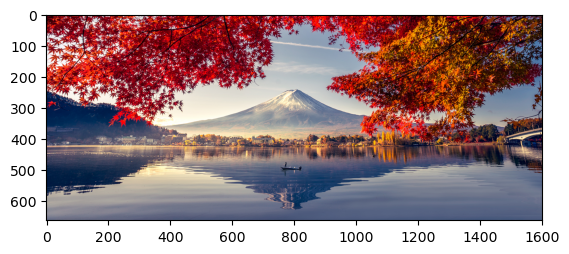

In [73]:
plt.imshow(image); # Исходное изображение

In [77]:
image

array([[[147,   2,  19],
        [115,   0,  17],
        [102,   0,  16],
        ...,
        [ 65,  24,  32],
        [ 63,  24,  29],
        [ 65,  24,  32]],

       [[165,  10,  24],
        [122,   1,  18],
        [ 98,   1,  21],
        ...,
        [ 62,  24,  35],
        [ 60,  23,  31],
        [ 60,  23,  30]],

       [[144,   8,  20],
        [109,   0,  21],
        [115,   0,  39],
        ...,
        [ 65,  32,  41],
        [ 62,  26,  36],
        [ 61,  26,  33]],

       ...,

       [[102, 108, 134],
        [102, 108, 134],
        [102, 109, 135],
        ...,
        [ 75,  91, 125],
        [ 75,  91, 125],
        [ 76,  92, 126]],

       [[100, 106, 132],
        [100, 107, 133],
        [ 98, 105, 131],
        ...,
        [ 73,  89, 123],
        [ 72,  91, 124],
        [ 74,  90, 124]],

       [[101, 107, 133],
        [100, 106, 132],
        [ 97, 103, 129],
        ...,
        [ 73,  89, 125],
        [ 74,  90, 124],
        [ 71,  92, 123]]

In [79]:
red_img   = image.copy()
green_img = image.copy()
blue_img  = image.copy()

red_img[:, :, 1] = 0
red_img[:, :, 2] = 0

green_img[:, :, 0] = 0
green_img[:, :, 2] = 0

blue_img[:, :, 0] = 0
blue_img[:, :, 1] = 0

In [76]:
red_img

array([[[147,   0,   0],
        [115,   0,   0],
        [102,   0,   0],
        ...,
        [ 65,   0,   0],
        [ 63,   0,   0],
        [ 65,   0,   0]],

       [[165,   0,   0],
        [122,   0,   0],
        [ 98,   0,   0],
        ...,
        [ 62,   0,   0],
        [ 60,   0,   0],
        [ 60,   0,   0]],

       [[144,   0,   0],
        [109,   0,   0],
        [115,   0,   0],
        ...,
        [ 65,   0,   0],
        [ 62,   0,   0],
        [ 61,   0,   0]],

       ...,

       [[102,   0,   0],
        [102,   0,   0],
        [102,   0,   0],
        ...,
        [ 75,   0,   0],
        [ 75,   0,   0],
        [ 76,   0,   0]],

       [[100,   0,   0],
        [100,   0,   0],
        [ 98,   0,   0],
        ...,
        [ 73,   0,   0],
        [ 72,   0,   0],
        [ 74,   0,   0]],

       [[101,   0,   0],
        [100,   0,   0],
        [ 97,   0,   0],
        ...,
        [ 73,   0,   0],
        [ 74,   0,   0],
        [ 71,   0,   0]]

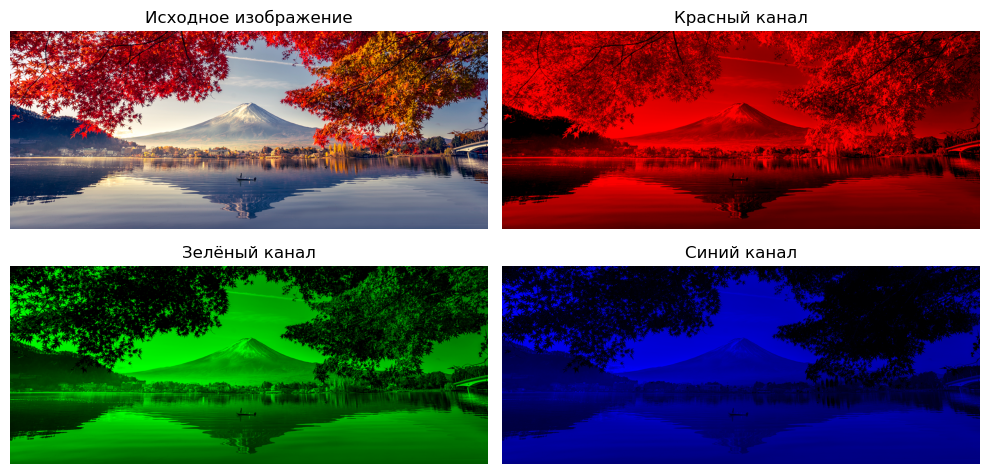

In [88]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

axes[0,0].imshow(image)
axes[0,0].set_title("Исходное изображение")
axes[0,0].axis("off")

axes[0,1].imshow(red_img)
axes[0,1].set_title("Красный канал")
axes[0,1].axis("off")

axes[1,0].imshow(green_img)
axes[1,0].set_title("Зелёный канал")
axes[1,0].axis("off")

axes[1,1].imshow(blue_img)
axes[1,1].set_title("Синий канал")
axes[1,1].axis("off")

plt.tight_layout()
plt.show()


__3.3 ML matrix multiplication__

* у вас есть датафрейм в котором есть три признака - x1, x2, x3
* Для этих признаков посчитаны веса линейной важности
* Получите линейное предсказание значения с этими весами и сохраните в переменную __y_pred__
* Посчитайте [MeanAbsoluteError(MAE)](https://miro.medium.com/v2/resize:fit:1400/1*DzKFPy5ECU7q--O4IJGiMA.png) между __y_pred__ и __y_true__
* Сравни с коллегами свой MAE
* цикл __for__ использовать нельзя
* если вам необходима подсказка, раскомментируйте код ниже и запустите в его в ячейке markdown.

In [ ]:
# $
# \begin{pmatrix}
# x_{11} & x_{12} & x_{13}\\ 
# x_{21} & x_{22} & x_{23}\\
# x_{31} & x_{32} & x_{33}\\
# ... & ... & ...\\
# x_{n1} & x_{n2} & x_{n3}\\
# \end{pmatrix}
# \cdot 
# \begin{pmatrix}
# w_1\\ 
# w_2\\
# w_3
# \end{pmatrix}
# =
# \begin{pmatrix}
# x_{11} \cdot w_1 + x_{12} \cdot w_2 + x_{13} \cdot w_3\\ 
# x_{21} \cdot w_1 + x_{22} \cdot w_2 + x_{23} \cdot w_3\\ 
# x_{31} \cdot w_1 + x_{32} \cdot w_2 + x_{33} \cdot w_3\\ 
# ... \\
# x_{n1} \cdot w_1 + x_{n2} \cdot w_2 + x_{n3} \cdot w_3\\ 
# \end{pmatrix}
# $

SyntaxError: invalid syntax (3457708869.py, line 1)

In [7]:
df = pd.read_csv('aux/LinRegtrain.csv').drop('Unnamed: 0', axis=1).rename(columns={'y': 'y_real'})

w = np.array([12, 5, -14])

__3.4 NeuralNet__

* У нас есть архитектура(Изображена на рисунке ниже), которая преобразовывает 5-мерный входной вектор в одномерное число. Необходимо реализовать эту архитектуру(без цикла __for__, используя лишь матричные умножения 😊

* Немножко комметариев. 

* 5 входов, каждый из которых далее, после домножения на некоторый вес будет уходить в узел(a1, a2, a3, a4), где их результаты сложатся с другими пришедшими в этот узел значениями. После подобный трюк повторяется, где значения уже агрегируются в один узел, который и будет выходным.

* У вас будет подаваться на вход 100 объектов, каждый имеет 5 координат(матрица 100x5). Необходимо поулчить для этих 100 объектов их 100 выходных значений(матрица 100x1) 

* Матрица весов данной архитектуры приведена ниже, как и входные данные.

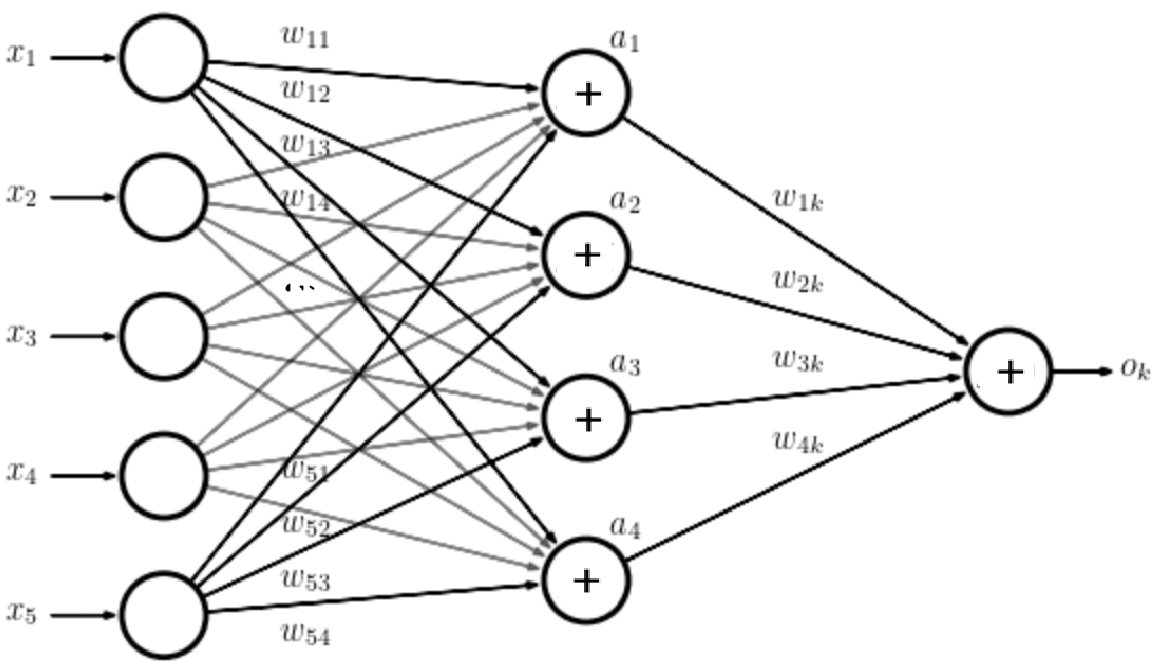

In [9]:
display(Image(filename='aux/NN_linalg.png', width=600))

In [15]:
from aux.test_file import true_result # для проверки

In [16]:
df = pd.read_csv('aux/df_neural_net.csv')

w_the_first_step = np.array(
    [
        [ 1.06959457,  0.39994398,  0.32458136,  2.83954369],
        [ 1.17062841, -1.14434952,  1.22011098,  1.15105695],
        [-1.33775915,  0.68586145, -0.50537923,  1.43315248],
        [ 0.0292406 , -0.25286966,  0.36698391,  1.27478642],
        [-0.01198158, -0.35860788, -0.14267706,  0.7329078 ]
    ]
)
w_the_second_step = np.array(
    [
        [-0.15203543],
        [-2.95253159],
        [-1.40000615],
        [-1.32788034]
    ]
)

In [ ]:
result = # your_code

In [ ]:
def check_result(my_result, true_result):
    return list(np.round(my_result, 3)) == list(np.round(true_result, 3))

In [ ]:
assert check_result(result, true_result), 'Ответ неверный! Поищи ошибку:)'

* Если ответ сошелся, поздравляю). Эта простейшая нейронная сеть, которая могла бы предсказывать по 5 входным параметрам одно значение, например уровень спроса в магазине и еще миллион примеров:)

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "linear algebra tasks completed"`
4. Выполни команду `git push`

Выполни команду в ячейке ниже `!git status`